In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, ndcg_score
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ndcg_score

In [22]:
test_df = pd.read_csv('/users/vladimirp/Desktop/мл-задача/test_df.csv')

train_df = pd.read_csv('/users/vladimirp/Desktop/мл-задача/train_df.csv')

In [23]:
test_df

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,493078,9,0,0,0,9,4,35,0,0,...,0.341683,0.067348,0.023012,0,0,0,0.46108,0.0,0.0,0
1525,493078,9,0,0,0,9,4,35,0,0,...,0.270293,0.049000,0.013244,0,0,0,0.03674,0.0,0.0,0
1526,493078,9,0,0,0,9,4,35,0,0,...,0.372268,0.069882,0.026015,0,0,0,0.14540,0.0,0.0,1
1527,493078,9,0,0,0,9,4,35,0,0,...,0.355755,0.077469,0.027560,0,0,0,0.21288,0.0,0.0,1


In [24]:
train_df

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [25]:
#Проверка на наличие пустых значений

missing_values_train = train_df.isnull().sum().sum()
missing_values_test = test_df.isnull().sum().sum()

missing_values_train, missing_values_test


(0, 0)

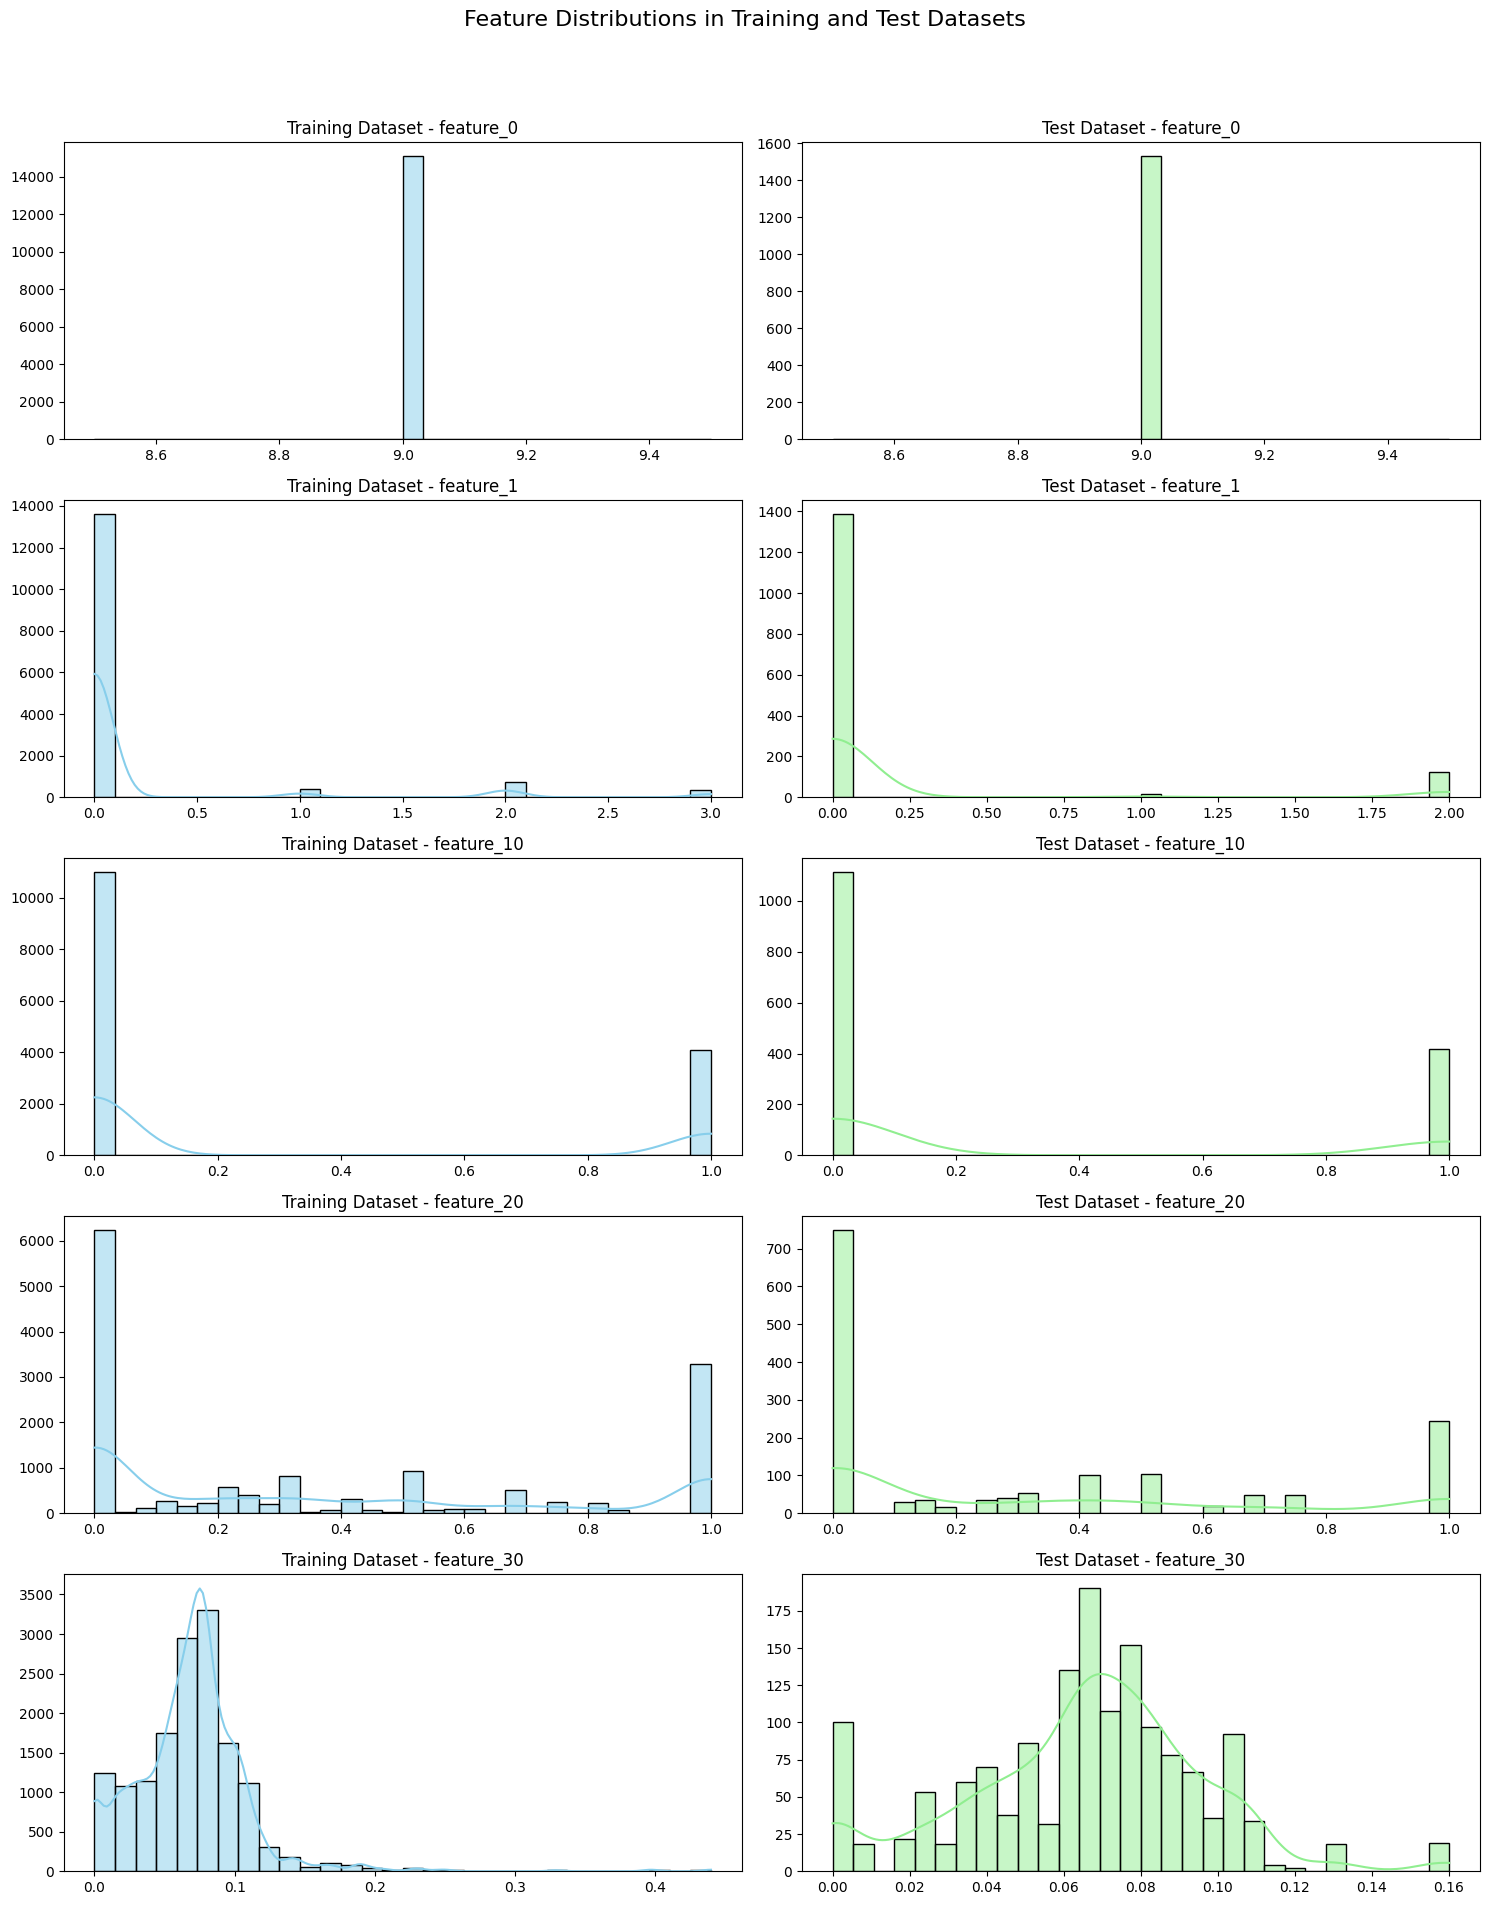

In [26]:
# Рандомно возьмем 5 фичей для проверки на дистрибуцию
sample_features = ['feature_0', 'feature_1', 'feature_10', 'feature_20', 'feature_30']

# Визуализация распределения для выбранных фичей 
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Feature Distributions in Training and Test Datasets', fontsize=16)

for i, feature in enumerate(sample_features):
    sns.histplot(train_df[feature], ax=axs[i, 0], kde=True, bins=30, color='skyblue')
    axs[i, 0].set_title(f'Training Dataset - {feature}')
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('')

    sns.histplot(test_df[feature], ax=axs[i, 1], kde=True, bins=30, color='lightgreen')
    axs[i, 1].set_title(f'Test Dataset - {feature}')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## NB
1. Распределение выбранных фичей в train и test сетах достаточно схожи, что позволяет предположить, что test сет может представлять собой репрезентативную выборку общего распределения данных.
2. Некоторые функции демонстрируют концентрированное распределение вокруг определенных значений, тогда как другие более разбросаны, что указывает на различную степень дисперсии.

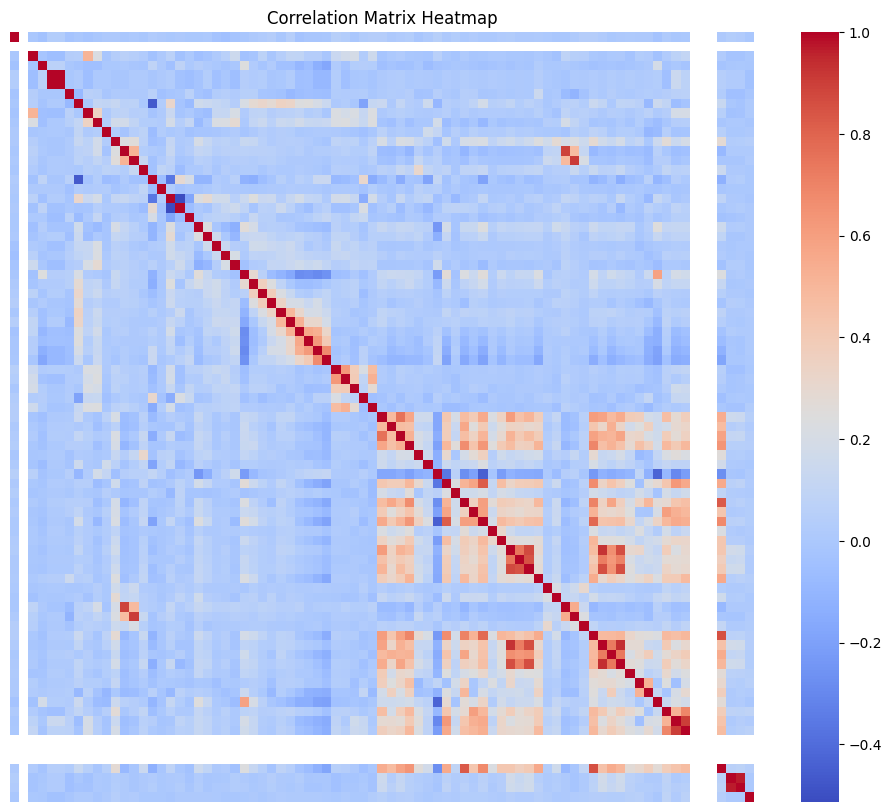

target        1.000000
feature_70    0.085841
feature_72    0.066936
feature_67    0.059212
feature_66    0.053812
                ...   
feature_4    -0.037827
feature_0          NaN
feature_73         NaN
feature_74         NaN
feature_75         NaN
Name: target, Length: 81, dtype: float64

In [27]:
# Корреляционная матрица
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Корреляция с таргетом по DESC
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
correlation_with_target

## NB
1. Большинство фичей не демонстрируют сильной корреляции с таргетной переменной, что характерно для датасетов со большим количеством признаков.
2. Самые сильная корреляция с целевой переменной наблюдаются у Feature_70, Feature_72, Feature_67 и Feature_66, хотя эти корреляции все еще относительно слабы (ниже 0,1). Это говорит о том, что ни одна фича не даст возможность быть основной для прогнозирования таргета.
3. Некоторые фичи (feature_0, Feature_73, Feature_74 и Feature_75) показывают NaN-овскую корреляцию, что указывает на то, что они могут иметь постоянные значения или не иметь дисперсии = потенциально они менее полезны для модели.

In [28]:
# Константные фичи
constant_features = [col for col in train_df.columns if train_df[col].nunique() == 1]

# Разделяем и откидываем таргет
X = train_df.drop(['target'] + constant_features, axis=1)
y = train_df['target']

# Train - Validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Размерность
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((12064, 76), (3017, 76), (12064,), (3017,))

In [29]:
# Наши сеты в lgb сеты
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Базовые параметры для начала
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# "Early stopping callback"
early_stopping_callback = lgb.early_stopping(stopping_rounds=100, verbose=True)

# Train
evals_result = {}
gbm = lgb.train(params,
                train_data,
                valid_sets=[valid_data],
                num_boost_round=1000,
                callbacks=[early_stopping_callback, lgb.record_evaluation(evals_result)])


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.733659


Confusion Matrix:
 [[2948    0]
 [  69    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2948
           1       0.00      0.00      0.00        69

    accuracy                           0.98      3017
   macro avg       0.49      0.50      0.49      3017
weighted avg       0.95      0.98      0.97      3017



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

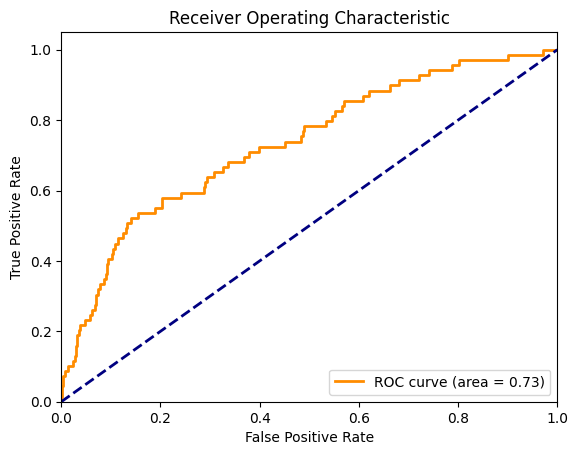

In [30]:
# Predictions
y_pred_prob = gbm.predict(X_val)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Assuming a threshold of 0.5

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Не дает positive показателей: 0 true positive показателей.
Постараемся улучшить модель.

In [31]:
# SMOTE
smote = SMOTE()

# Сделаем новый training сет с синтетикой
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [33]:
# Модель с SMOTE данными
model_smote = lgb.LGBMClassifier()

model_smote.fit(
    X_train_smote, 
    y_train_smote, 
    eval_set=[(X_val, y_val)],
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(period=50)]
)

# Predict
y_pred_smote = model_smote.predict(X_val)
y_pred_prob_smote = model_smote.predict_proba(X_val)[:, 1]

# Performance метрики
conf_matrix_smote = confusion_matrix(y_val, y_pred_smote)
class_report_smote = classification_report(y_val, y_pred_smote)
fpr_smote, tpr_smote, _ = roc_curve(y_val, y_pred_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

[LightGBM] [Info] Number of positive: 11811, number of negative: 11811
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15665
[LightGBM] [Info] Number of data points in the train set: 23622, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
[50]	valid_0's binary_logloss: 0.130412
[100]	valid_0's binary_logloss: 0.116265
Did not meet early stopping. Best iteration is:
[98]	valid_0's binary_logloss: 0.115764


Confusion Matrix:
 [[2933   15]
 [  69    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2948
           1       0.00      0.00      0.00        69

    accuracy                           0.97      3017
   macro avg       0.49      0.50      0.49      3017
weighted avg       0.95      0.97      0.96      3017



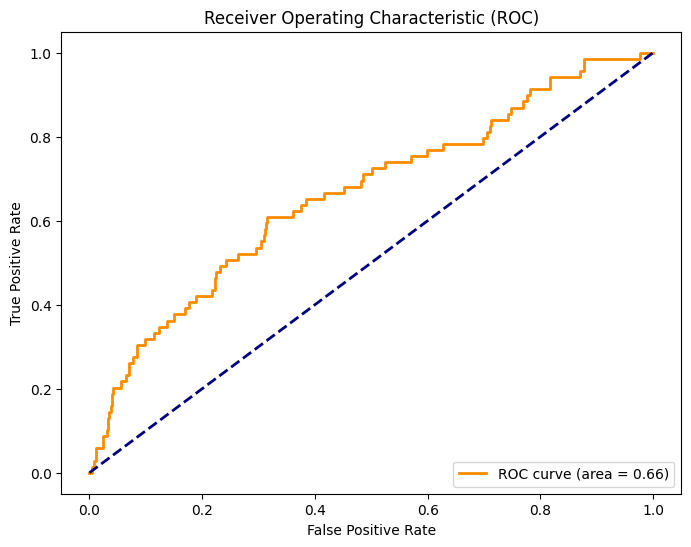

In [34]:
# Predict
y_pred_smote = model_smote.predict(X_val)
y_pred_prob_smote = model_smote.predict_proba(X_val)[:, 1]

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_val, y_pred_smote)
print("Confusion Matrix:\n", conf_matrix_smote)

# Precision, Recall, F1
class_report_smote = classification_report(y_val, y_pred_smote)
print("Classification Report:\n", class_report_smote)

# ROC Curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_val, y_pred_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


AUC снизился.
True positive снова = 0.
Но false positive = 15.
Пробуем дальше.

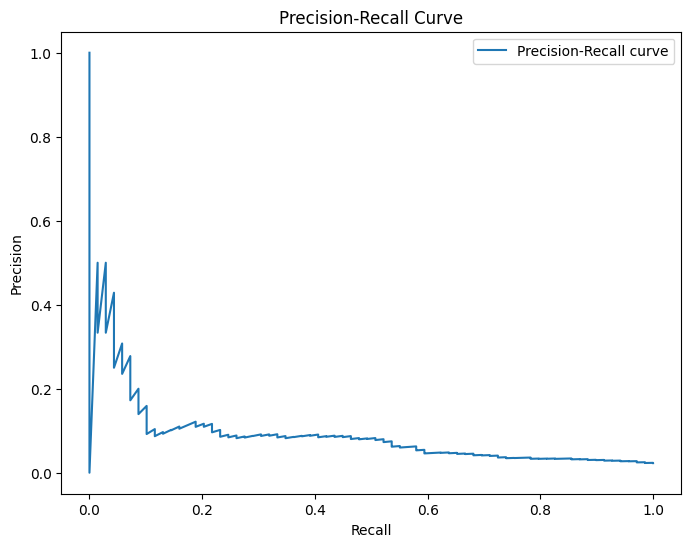

Chosen Threshold: 0.022913300613011996
Confusion Matrix:
 [[2559  389]
 [  34   35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      2948
           1       0.08      0.51      0.14        69

    accuracy                           0.86      3017
   macro avg       0.53      0.69      0.53      3017
weighted avg       0.97      0.86      0.91      3017



In [36]:
y_pred_prob_original = gbm.predict(X_val)

# Precision и recall для разных thresholds
precision_original, recall_original, thresholds_original = precision_recall_curve(y_val, y_pred_prob_original)

# Precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_original, precision_original, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Выборка
threshold_index = np.argmax(np.sqrt(precision_original * recall_original))
chosen_threshold = thresholds_original[threshold_index]

y_pred_adjusted_original = (y_pred_prob_original >= chosen_threshold).astype(int)

# Новые Confusion Matrix и Classification Report
new_conf_matrix_original = confusion_matrix(y_val, y_pred_adjusted_original)
new_class_report_original = classification_report(y_val, y_pred_adjusted_original)

print(f"Chosen Threshold: {chosen_threshold}")
print("Confusion Matrix:\n", new_conf_matrix_original)
print("Classification Report:\n", new_class_report_original)


In [40]:
# 2d массив
true_relevances = np.asarray([y_val])

# Также в 2d массив
predicted_scores = np.asarray([y_pred_prob_original])

# NDCG
ndcg_val = ndcg_score(true_relevances, predicted_scores)

print(f"NDCG Score on Validation Set: {ndcg_val}")


NDCG Score on Validation Set: 0.573324057857829


Ради интереса посчитали NDCG для validation сета, чтобы заранее посмотреть на успехи ранжирования.

Так как мы не имеем четкого бизнес контекста, попробуем улучшить показатели нашей модели через тюнинг гиперпараметров. 

In [41]:
# Задаем гиперпараметры для grid search
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [10, 20, -1],  # -1 = без лимитов
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],  # 1.0 = без subsampling
    'colsample_bytree': [0.8, 1.0],
}

# Инициализируем модель
lgbm = LGBMClassifier(objective='binary')

# Инициализируем GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Фиттим GridSearchCV
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best AUC found: {grid_search.best_score_}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negati

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad sin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warnin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-thre

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.8404

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004632 seconds.
You can set `fo

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004665 seconds.
You

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad sin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 96

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12609
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Info] Number of positive: 203, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12611
[LightGBM] [Info] Number of data points in the train set: 9652, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021032 -> initscore=-3.840458
[LightGBM] [Info] Start training from score -3.840458
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12607
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 203, number of negative: 9448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12605
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021034 -> initscore=-3.840352
[LightGBM] [Info] Start training from score -3.840352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 202, number of negative: 9449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12623
[LightGBM] [Info] Number of data points in the train set: 9651, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020930 -> initscore=-3.845396
[LightGBM] [Info] Start training from score -3.845396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 50, 'subsample': 0.8}
### Best AUC found: 0.7245394815093784

In [68]:
# Новые параметры
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.01,
    'num_leaves': 50,
    'max_depth': 20,
    'n_estimators': 200,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'verbose': -1
}

# "Early stopping callback"
early_stopping_callback = lgb.early_stopping(stopping_rounds=100, verbose=True)

# Train
evals_result = {}
gbm_tuned = lgb.train(params,
                train_data,
                valid_sets=[valid_data],
                num_boost_round=1000,
                callbacks=[early_stopping_callback, lgb.record_evaluation(evals_result)])

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[163]	valid_0's auc: 0.744165


Confusion Matrix:
 [[2548  400]
 [  39   30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      2948
           1       0.07      0.43      0.12        69

    accuracy                           0.85      3017
   macro avg       0.53      0.65      0.52      3017
weighted avg       0.96      0.85      0.90      3017



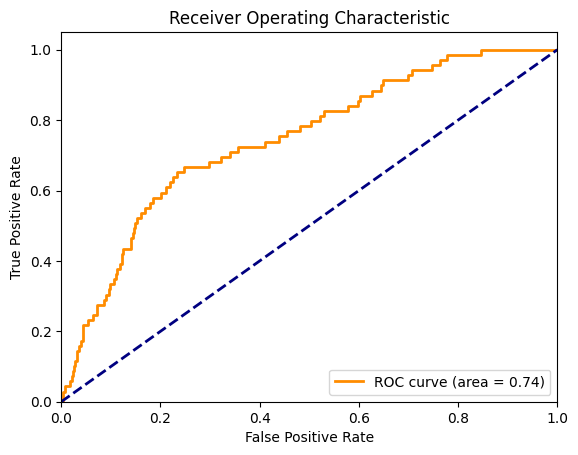

In [69]:
# Predictions
y_pred_prob_tuned = gbm_tuned.predict(X_val)
y_pred = (y_pred_prob_tuned >= 0.022913300613011996).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob_tuned)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [70]:
# В 2d массив
true_relevances = np.asarray([y_val])
scores = np.asarray([y_pred_prob_tuned])

# NDCG
ndcg_val_score = ndcg_score(true_relevances, scores)

print(f"NDCG Score on Validation Set: {ndcg_val_score}")


NDCG Score on Validation Set: 0.513495946514146


In [71]:
# Константные фичи
constant_features = [col for col in test_df.columns if test_df[col].nunique() == 1]

# Разделяем и откидываем таргет
X_test = test_df.drop(['target'] + constant_features, axis=1)
y_test = test_df['target']


# Размерность
X_test.shape, y_test.shape

((1529, 76), (1529,))

Confusion Matrix:
 [[1310  185]
 [  14   20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1495
           1       0.10      0.59      0.17        34

    accuracy                           0.87      1529
   macro avg       0.54      0.73      0.55      1529
weighted avg       0.97      0.87      0.91      1529

Test AUC Score: 0.756049577021444


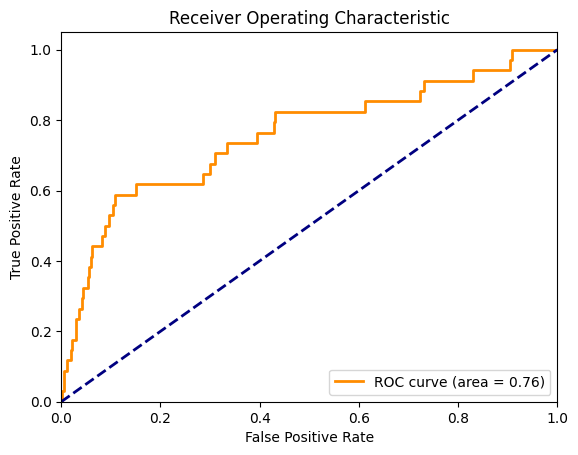

Test NDCG Score: 0.5443211631843333


In [74]:
y_pred_prob_test = gbm_tuned.predict(X_test)

# В бинарную систему 
y_pred_test = (y_pred_prob_test >= 0.022913300613011996).astype(int)

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix_test)

# Precision, Recall, F1-Score
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report_test)

# ROC AUC 
test_auc_score = roc_auc_score(y_test, y_pred_prob_test)
print(f"Test AUC Score: {test_auc_score}")

# ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Также в 2d массив
true_relevances_test = np.asarray([y_test])
scores_test = np.asarray([y_pred_prob_test])

test_ndcg_score = ndcg_score(true_relevances_test, scores_test)
print(f"Test NDCG Score: {test_ndcg_score}")


Результаты оценки тестового набора данных показывают, что модель работает относительно хорошо:

AUC: AUC составляет 0,756, что говорит о хорошей способности модели различать положительные и отрицательные классы. Это неплохой результат, немного выше того, что мы видели на наборе данных для проверки.

Confusion Matrix: Модель определила 20 из 34 положительных случаев, что дает нам довольно высокий показатель recall 0,59 для такого небольшого количества положительных случаев. Однако есть и 185 ложных срабатываний.

Precision: Точность для положительного класса составляет 0,10, что является низким показателем, указывающим на большое количество ложных срабатываний среди предсказанных положительных случаев.

Recall: Показатель recall для положительного класса относительно высок и составляет 0,59, что означает, что модель может идентифицировать большинство положительных случаев.

F1-Score: для положительного класса составляет 0,17, что довольно мало из-за низкой точности, но это баланс между точностью и отзывом.

Accuracy : общая точность модели составляет 0,87, что довольно высоко, но следует помнить, что точность не всегда является лучшей метрикой для несбалансированных наборов данных.

NDCG: NDCG в 0,544 указывает на то, что модель ранжирует экземпляры лучше, чем случайные, но не идеально. Есть возможности для улучшения того, как модель ранжирует положительные экземпляры.

## Интерпретация
Модель демонстрирует многообещающую способность определять положительные экземпляры (высокий показатель recall), что может иметь решающее значение в зависимости от области применения. Однако количество ложных срабатываний также велико, что может быть нежелательным в зависимости от контекста.

Оценка NDCG показывает, что ранжирование предсказаний модели является умеренно хорошим, что может быть достаточным или недостаточным в зависимости от требований конкретной задачи.

Попробуем по-другому посмотреть на модель. Давайте постараемся заменим бинарную систему на lambdarank и будем смотреть сразу только NDCG в качестве метрики оценивания. (тест ради интереса)

In [81]:
new_params = {
    'boosting_type': 'gbdt',
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'ndcg_at': [5, 10, 20],
    'learning_rate': 0.01,
    'num_leaves': 50,
    'max_depth': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'verbose': -1
}


unique_search_sessions = train_df['search_id'].unique()


# Пытаемся группировать по "search_id"
train_group = [len(group) for _, group in X_train.groupby('search_id')]
valid_group = [len(group) for _, group in X_val.groupby('search_id')]


# Создаем lbd сеты
train_data = lgb.Dataset(X_train, label=y_train, group=train_group)
valid_data = lgb.Dataset(X_val, label=y_val, group=valid_group, reference=train_data)


# Train
gbm_last = lgb.train(new_params,
                     train_data,
                     valid_sets=[valid_data],
                     num_boost_round=1000,
                     callbacks=[early_stopping_callback, lgb.record_evaluation(evals_result)])

# Predict
test_scores = gbm_last.predict(X_test)

# 1d массив
test_ndcg_score = ndcg_score(np.asarray([y_test]), np.asarray([test_scores]))

print(f"Test NDCG Score: {test_ndcg_score}")


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[158]	valid_0's ndcg@5: 0.984408	valid_0's ndcg@10: 0.984408	valid_0's ndcg@20: 0.984408
Test NDCG Score: 0.4709759116200386


С данной моделью в будущем можно очень много работать. Зная конкретный бизнес-кейс данных датасетов и ограничения по метрикам, возможно корректировать работу в зависимости от потребностей.
К сожалению, я никогда не работал с lambdarank, но знаю, что данный способ требует группировки данных, возможно, она была выполнена не совсем корректно.